In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
#plt.rcParams['text.usetex'] = True

from tridimensional import *

# 3D
Levels are the same of 2D, but there is an extra component depending on a new quantum number $n_z$.
Working with the dimensionless energy, the energy levels are
$$\tilde{\epsilon}_{n,n_z}= Z(\frac12 + n)+\pi n_z^2$$
where $n\in\mathcal{N}$ and $n_z\in\mathcal{Z}$ and $Z$ is the number of quantum fluxes.

Even the number of states with the same quantum number $n$ are the same, because the behaviour of the system in the x-y plane is the same as the bidimensional case:
$$deg(n) = \frac{L}{\frac{2\pi}{L}\frac{\hbar}{eB}}=\frac{L^2}{\Phi_0}B=\frac{\Phi}{\Phi_0}=Z$$ 

## Density of states

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': 'The vertical lines are $\\delta$ with the\nheight specified in the plot\nThe black line is at $\\epsilon_f$\n$Z=\\Phi/\\Phi_0=$1255'}, xlabel='Dimensionless Energy $\\epsilon$', ylabel='g($\\epsilon$)'>)

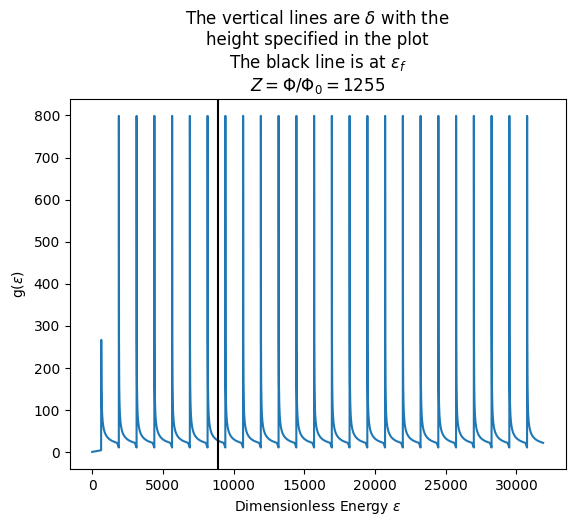

In [16]:
"""Density of state and fermi level"""
Z = 1255    # Number of quantum fluxes
num_levels = 500 # Index of the last energy level to plot
N = 330000  # Number of electrons
plot_fermi_over_density3D(Z,N,num_levels)

## Fermi level dependance on B

Text(0.5, 1.0, '$\\epsilon_f$ dependance on B field\n$Z \\propto B$')

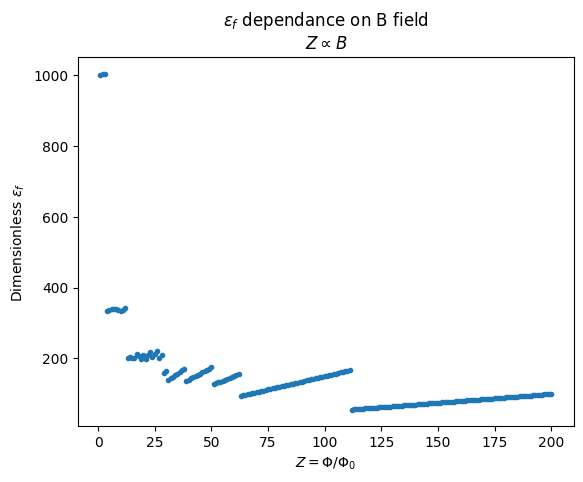

In [5]:
"""Ef dependance on B"""
N = int(1000)
num_Zs = 200 # Number of values of Z (so of B) considered
Zs = np.arange(1,num_Zs+1)
i = 0
fermi_energies = np.zeros(num_Zs)
for Z in Zs:
    fermi_energies[i] = fermi_level3D(Z,N)
    i = i + 1
fig, ax = plt.subplots()
ax.plot(Zs, fermi_energies,'.')
ax.set_ylabel("Dimensionless $\epsilon_f$")
ax.set_xlabel("$Z=\Phi/\Phi_0$")
ax.set_title("$\epsilon_f$ dependance on B field\n$Z \propto B$")

In [12]:
"""ANIMATION of the dependance of g(\epsilon) and \epsilon_f changing B"""
N = int(330000)
Zs = np.arange(1200,1400)
num_Zs = len(Zs) # Number of values of Z (so of B) considered
num_levels = 500

i = 0
fermi_energies = np.zeros(num_Zs)
for Z in Zs:
    fig, ax = plot_fermi_over_density3D(Z,N,num_levels)
    ax.set_xlim(0,fermi_level3D(Z,2*N))
    ax.set_ylim(0,1000)
    if not os.path.exists("gif"):
        os.makedirs("gif")
    fig.savefig("gif/"+str(Z)+'.png')
    plt.close(fig)


"""Create animation"""
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("gif/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('animation.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=10, loop=0)